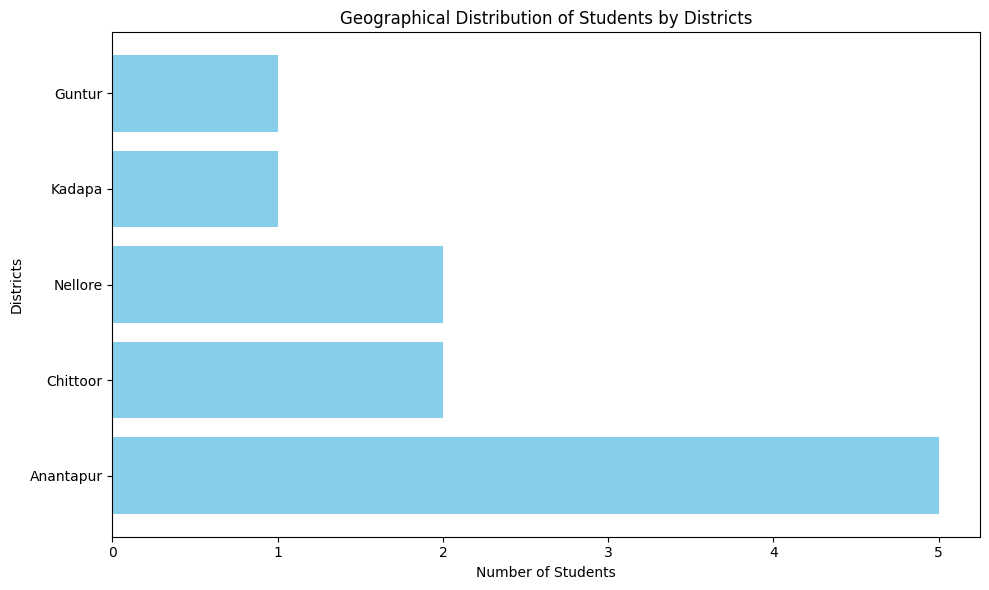

In [ ]:
import tkinter as tk
from tkinter import ttk, messagebox
import sqlite3
from datetime import datetime
import matplotlib.pyplot as plt
from threading import Thread

root = tk.Tk()
root.title("Student Management System with Geographical Analysis")
# root.attributes("-fullscreen", True)
root.geometry("800x600")

connection = sqlite3.connect('management.db')

TABLE_NAME = "management_table"
STUDENT_ID = "student_id"
STUDENT_NAME = "student_name"
STUDENT_ROLL = "student_roll"
STUDENT_COLLEGE = "student_college"
STUDENT_ADDRESS = "student_address"
STUDENT_PHONE = "student_phone"

connection.execute(f"CREATE TABLE IF NOT EXISTS {TABLE_NAME} ( " +
                   f"{STUDENT_ID} INTEGER PRIMARY KEY AUTOINCREMENT, " +
                   f"{STUDENT_NAME} TEXT, " +
                   f"{STUDENT_ROLL} INTEGER, " +
                   f"{STUDENT_COLLEGE} TEXT, " +
                   f"{STUDENT_ADDRESS} TEXT, " +
                   f"{STUDENT_PHONE} INTEGER, " +
                   f"timestamp TEXT);")


titleLabel = tk.Label(root, text="Student Management System with Geographical Analysis", fg="#974EC3", font=("Sylfaen", 24))
titleLabel.pack(pady=20)

def openInputWindow():
    inputWindow = tk.Toplevel()
    inputWindow.title("Add Student Data")

    nameLabel = tk.Label(inputWindow, text="Enter Name", width=40, anchor='w',
                         font=("Sylfaen", 12))
    rollLabel = tk.Label(inputWindow, text="Enter Roll Number", width=40, anchor='w',
                         font=("Sylfaen", 12))
    collegeLabel = tk.Label(inputWindow, text="Enter College", width=40, anchor='w',
                            font=("Sylfaen", 12))
    phoneLabel = tk.Label(inputWindow, text="Enter Phone Number", width=40, anchor='w',
                          font=("Sylfaen", 12))
    addressLabel = tk.Label(inputWindow, text="Enter District", width=40, anchor='w',
                            font=("Sylfaen", 12))

    nameEntry = tk.Entry(inputWindow, width=30)
    rollEntry = tk.Entry(inputWindow, width=30)
    collegeEntry = tk.Entry(inputWindow, width=30)
    phoneEntry = tk.Entry(inputWindow, width=30)
    addressEntry = tk.Entry(inputWindow, width=30)

    nameLabel.grid(row=1, column=0, padx=(10,0), pady=(30, 0))
    rollLabel.grid(row=2, column=0, padx=(10,0))
    collegeLabel.grid(row=3, column=0, padx=(10,0))
    phoneLabel.grid(row=4, column=0, padx=(10,0))
    addressLabel.grid(row=5, column=0, padx=(10,0))

    nameEntry.grid(row=1, column=1, padx=(0,10), pady=(30, 20))
    rollEntry.grid(row=2, column=1, padx=(0,10))
    collegeEntry.grid(row=3, column=1, padx=(0,10), pady = 20)
    phoneEntry.grid(row=4, column=1, padx=(0,10), pady = 20)
    addressEntry.grid(row=5, column=1, padx=(0,10), pady = 20)

    def takeNameInputInInputWindow():
        username = nameEntry.get()
        roll = int(rollEntry.get())
        collegeName = collegeEntry.get()
        phone = int(phoneEntry.get())
        address = addressEntry.get()

        timestamp = datetime.now().strftime('%Y-%m-%d %H:%M:%S')
    
        connection.execute("INSERT INTO " + TABLE_NAME + " ( " + STUDENT_NAME + ", " +
                       STUDENT_ROLL + ", " + STUDENT_COLLEGE + ", " +
                       STUDENT_ADDRESS + ", " + STUDENT_PHONE + ", timestamp ) VALUES ( '"
                       + username + "', " + str(roll) + ", '" + collegeName + "', '" +
                       address + "', " + str(phone) + ", '" + timestamp + "' ); ")

        connection.commit()
        messagebox.showinfo("Success", "Data Saved Successfully.")

        nameEntry.delete(0, tk.END)
        rollEntry.delete(0, tk.END)
        collegeEntry.delete(0, tk.END)
        phoneEntry.delete(0, tk.END)
        addressEntry.delete(0, tk.END)

    addButton = tk.Button(inputWindow, text="Add", command=takeNameInputInInputWindow)
    addButton.grid(row=6, column=0, columnspan=2, pady=20)

    inputWindow.mainloop()

def displayResults():
    root.withdraw()

    secondWindow = tk.Tk()
    secondWindow.title("Display Results")


    titleLabel = tk.Label(secondWindow, text="Student Management System with Geographical Analysis", fg="#974EC3", font=("Sylfaen", 24))
    titleLabel.pack(pady=20)

    tree = ttk.Treeview(secondWindow)
    tree["columns"] = ("one", "two", "three", "four", "five")  # Update number of columns

    tree.heading("one", text="Student Name")
    tree.heading("two", text="Roll Number")
    tree.heading("three", text="College Name")
    tree.heading("four", text="Address")
    tree.heading("five", text="Phone Number")

    cursor = connection.execute(f"SELECT * FROM {TABLE_NAME};")
    i = 0

    for row in cursor:
        tree.insert('', i, text= str(i+1),values=(row[1], row[2], row[3], row[4], row[5]))  # Update values tuple
        i = i + 1

    tree.pack()

    homeButton = tk.Button(secondWindow, text="Go to Home", command=lambda: [secondWindow.destroy(), root.deiconify()])
    homeButton.pack(pady=20)

    deleteButton = tk.Button(secondWindow, text="Delete", command=lambda: deleteStudent(tree))
    deleteButton.pack()

    secondWindow.mainloop()

def geographicalDistributionAnalysis():
    cursor = connection.execute(f"SELECT {STUDENT_ADDRESS} FROM {TABLE_NAME};")
    addresses = [row[0] for row in cursor.fetchall()]

    city_counts = {}

    for address in addresses:
        parts = address.split(', ')
        city = parts[-1]  # Get the last part of the split address as the city name

        if city in city_counts:
            city_counts[city] += 1
        else:
            city_counts[city] = 1

    cities = list(city_counts.keys())
    student_counts = list(city_counts.values())

    plt.figure(figsize=(10, 6))
    plt.barh(cities, student_counts, color='skyblue')
    plt.xlabel('Number of Students')
    plt.ylabel('Districts')
    plt.title('Geographical Distribution of Students by Districts')
    plt.tight_layout()
    # Display the plot in a separate thread to avoid blocking the main GUI loop
    plot_thread = Thread(target=plt.show)
    plot_thread.start()

def searchResults():
    root.withdraw()

    secondWindow1 = tk.Tk()
    secondWindow1.title("Search Student")
    

    titleLabel = tk.Label(secondWindow1, text="Student Management System with Geographical Analysis", fg="#974EC3", font=("Sylfaen", 24))
    titleLabel.pack(pady=20)

    searchLabel = tk.Label(secondWindow1, text="Search Student", font=("Sylfaen", 16))
    searchLabel.pack(pady=20)

    searchEntry = tk.Entry(secondWindow1, width=30)
    searchEntry.pack()

    searchButton = tk.Button(secondWindow1, text="Search", command=lambda: searchStudentName(searchEntry.get(), tree))
    searchButton.pack()

    tree = ttk.Treeview(secondWindow1)
    tree["columns"] = ("one", "two", "three", "four", "five")  # Update number of columns

    tree.heading("one", text="Student Name")
    tree.heading("two", text="Roll Number")
    tree.heading("three", text="College Name")
    tree.heading("four", text="Address")
    tree.heading("five", text="Phone Number")

    cursor = connection.execute(f"SELECT * FROM {TABLE_NAME};")
    i = 0

    for row in cursor:
        tree.insert('', i, text= str(i+1),
                    values=(row[1], row[2], row[3], row[4], row[5]))  # Update values tuple
        i = i + 1

    tree.pack()



    homeButton = tk.Button(secondWindow1, text="Go to Home", command=lambda: [secondWindow1.destroy(), root.deiconify()])
    homeButton.pack(pady=20)

    secondWindow1.mainloop()


def searchStudentName(name, tree):
    cursor = connection.execute(f"SELECT * FROM {TABLE_NAME} WHERE {STUDENT_NAME} LIKE ?", (f"%{name}%",))
    rows = cursor.fetchall()

    if not rows:
        messagebox.showinfo("Search Result", f"No student found with the name '{name}'.")
        return

    searchResultsWindow = tk.Toplevel()
    searchResultsWindow.title("Search Results")
    # searchResultsWindow.geometry("800x600")

    titleLabel = tk.Label(searchResultsWindow, text="Search Results", fg="#974EC3", font=("Sylfaen", 24))
    titleLabel.pack(pady=20)

    searchTree = ttk.Treeview(searchResultsWindow)
    searchTree["columns"] = ("one", "two", "three", "four", "five")  # Update number of columns

    searchTree.heading("one", text="Student Name")
    searchTree.heading("two", text="Roll Number")
    searchTree.heading("three", text="College Name")
    searchTree.heading("four", text="Address")
    searchTree.heading("five", text="Phone Number")

    i = 0
    for row in rows:
        searchTree.insert('', i, text=str(i+1),
                        values=(row[1], row[2], row[3], row[4], row[5]))  # Update values tuple
        i += 1

    searchTree.pack()


def deleteStudent(tree):
    selected_items = tree.selection()
    
    if not selected_items:
        messagebox.showerror("Error", "No student selected for deletion.")
        return

    selected_item = selected_items[0]
    item_id = tree.index(selected_item)

    selected_item_details = tree.item(selected_item)
    student_name = selected_item_details['values'][0]

    result = messagebox.askquestion("Delete", f"Are You Sure You Want to Delete {student_name}?", icon='warning')
    if result == 'yes':
        connection.execute(f"DELETE FROM {TABLE_NAME} WHERE {STUDENT_NAME}=?", (student_name,))
        connection.commit()
        tree.delete(selected_item)

addDataButton = tk.Button(root, text="Add Data", command=openInputWindow, font=("Sylfaen", 16))
addDataButton.pack(pady=10)

displayButton = tk.Button(root, text="Display Results", command=displayResults, font=("Sylfaen", 16))
displayButton.pack(pady=10)

searchButton = tk.Button(root, text="Search", command=searchResults, font=("Sylfaen", 16))
searchButton.pack(pady=10)

# growthButton = tk.Button(root, text="Growth Analysis", command=growthAnalysis, font=("Sylfaen", 16))
# growthButton.pack(pady=10)

geographicalButton = tk.Button(root, text="Geographical Analysis", command=geographicalDistributionAnalysis, font=("Sylfaen", 16))
geographicalButton.pack(pady=10)

root.mainloop()
